# Interatomic force field (IFF) optimization for W-based metal alloys

## Input data preparation

Author: Lukas Vlcek

Start Date: 2018-04-22

In [1]:
from datetime import datetime ; print('Last update:', datetime.now())

Last update: 2018-07-11 13:03:54.076178


## 1. Target data overview

### Bulk properties of tungsten
from _Marinica et.al_ except for B (bulk modulus) and Pc (Cauchy pressure)

T=0K?

| Property | BCC | FCC |
| :---     | :---: | :---: |
| a_0 (A) | 3.1648 | 4.054 |
| E_coh (eV/atom) | -8.9 | -8.43 |
| C11 (GPa) | 523 | - |
| C12 (GPa) | 203 | - |
| C44 (GPa) | 160 | - |
| B (GPa) | 310.4 | - |
| Pc (GPa) | 21.9 | - |

### Defect properties
(from _Marinica et.al_)

Based on 128+-1 atoms

Defect | Energy (eV)
:--- | :---:
(111) | 10.53
(110) | 10.82
(100) | 12.87
OCT | 13.11
TET | 12.27
Vacancy | 3.49

### Atomic configurations and DFT data

1. Data from Marinica
  * 20 configurations generated from liquid Fe trajectory, N=113
  * DFT Forces
  * DFT Energy
2. Data from German (local minimum energy configs.)
  * Energy, Hessians?
  * Pure phases
    * BCC (54 atoms)
    * FCC (32 atoms)
  * Vacancy
    * vacancy (53 atoms)
  * Interstitial defects 
    * 110, 111 (55 atoms)
  * Screw dislocation
    * 111_easy_core (135 atoms)?

## 3. IFF functional form

### 3.1 Finnis-Sinclair potential

Energy of an N-particle configuration

$$ E = \sum_{i=1}^N \left[ \sum_{j>i}^N V\left(r_{ij}\right) + F\left(\rho_i\right) \right] $$

Pair interaction

$$ V\left(r_{ij}\right) = \left(r_{ij}-c\right)^2\left(c_0 + c_1r_{ij} + c_2r_{ij}^2\right),\,\, r_{ij}\le c $$


Embedded function

$$ F = -A\sqrt{\rho_i} $$

Effective electron density

$$ \rho_i = \sum_{j\ne i}^N \phi\left(r_{ij}\right) $$

Cohesive potential

$$ \phi\left(r_{ij}\right) = \left(r_{ij}-d\right)^2,\,\, r_{ij}\le d $$

** Starting W parameters: ** (Finnis and Sinclair, _Phil. Mag. A_, **50(1)**, 45-66, 1984)
* Fixed
  * c = 3.25
  * d = 4.400224
* To be optimized
  * A = 1.896373
  * c0 = 47.1346499
  * c1 = -33.7665655
  * c2 = 6.2541999
  
### 3.2 EAM used by Bonny et al. 2017

Energy of an N-particle configuration

$$ E = \sum_{i=1}^N \left[ \sum_{j>i}^N V_{t_it_j}\left(r_{ij}\right) + F_{t_i}\left(\rho_i\right) \right] $$

Pair interaction

$$ V_{t_it_j}\left(r_{ij}\right) = \sum_{k=1}^{N_p}\left[a_k\left(r_k - r_{ij}\right)^3\Theta\left(r_k - r_{ij}\right)\right]\ $$


Embedded function

$$ F_{t_i}(\rho_i) = A_{t_i}\sqrt{\rho_i} + B_{t_i}\rho + C_{t_i}\rho^2 $$

Effective electron density

$$ \rho_i = \sum_{j\ne i}^N \phi_{t_j}\left(r_{ij}\right) $$

Cohesive potential

$$ \phi\left(r_{ij}\right) = D_{t_j}\left(r_c - r_{ij}\right)^3\Theta\left(r_c - r_{ij}\right) $$

** Starting W parameters: ** (Finnis and Sinclair, _Phil. Mag. A_, **50(1)**, 45-66, 1984)
* Fixed
  * c = 3.25
  * d = 4.400224
* To be optimized
  * A = 1.896373
  * c0 = 47.1346499
  * c1 = -33.7665655
  * c2 = 6.2541999

## 4. Loss function

**Squared statistical distance**

  $$ s^2 = \arccos^2\left(C_B\right) $$


1. Ab initio data
  * Energies
    $$ C_B = \sum_{k=1}^{kmax} \exp\left[ -\beta\left(\Delta u_k - \Delta F\right)/2\right] $$
  * Forces
  * Hessians

2. Structural fluctuations
  * Fit Gaussian distributions described by bulk parameters
    * Mean values (A): lattice parameters (at a particular T
    * Variance (V): depends on elastic constants
    
  $$ \ln\left(C_B\right) = \frac{1}{4k_BT^2}\frac{\left(A_M - A_T\right)^2}{4\left(V_M - V_T\right)} - \frac{1}{4}\ln\frac{4 V_MV_T}{\left(V_M+V_T\right)^2} $$ 
  
  * How exactly are the different elastic constants defined?
  * Translate C11, C12, C44 to variances

## 5. Optimization

* A set of Fortran codes for parameter search on grid at:'https://github.com/vlcekl/sopt/tree/master/src/optimize/search_grid'
* A Python script for simplex search at https://github.com/vlcekl/sopt/tree/master/src/optimize/search_simplex

### Optimize F-S potential from simulations with Ackland potential (constant N, T, and stress)

** Original W parameters: ** (Finnis and Sinclair, _Phil. Mag. A_, **50(1)**, 45-66, 1984)
* Fixed
  * c = 3.25
  * d = 4.400224
* Reference values
  * A = 1.896373
  * c0 = 47.1346499
  * c1 = -33.7665655
  * c2 = 6.2541999

---
* Optimized from trajectories with Ackland potential (Ackland and Thetford, 1987) 

**300K BCC**

  * A = 2.32  
  * c0 = 58.5  ( 58.0 to 60.0)
  * c1 = -28.0 (-28 to -30.5)
  * c2 = 6.075   (5.95  to 6.8)
  
**2000K BCC**

  * A = 2.32  
  * c0 = 59.5  ( 47.0 to 60.0)
  * c1 = -28.0 
  * c2 = 6.75  (  6.4 to 6.775)
  
**300K FCC**

  * A = 2.325  
  * c0 = 69.5  ( 66.5 to 69.5)
  * c1 = -30.0 (-29.0 to -31.0)
  * c2 = 5.725  (  5.65 to 6.35)

**Notes**

Need to constrain average potential energy to the target value; sampling around the equilibrium position does not provide sufficient constraints for the potential outside that region.


Elastic constants from fluctuations of the strain tensor in NPT (1 ns) - too much noise.

* $C_{11}$ = 2260 GPa  (523)
* $C_{12}$ =  681 GPa  (203)

Longer simulations and finite stress may be needed for accurate calculations (Shinoda et al, 2004).


### Explore spline potentials

In [2]:
%matplotlib inline
import sys
import re
import numpy as np
import matplotlib.pyplot as plt

### Tungsten EAM IFF functions and parameters from Marinica et al. (corrected)

In [3]:
# Gauge conversion perameters
C = 1.848055990
S = 2.232322602e-1

# electronic density function (cubic splines)
rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

Fc = lambda d, a: a[0] + a[1]*d + a[2]*d**2 + a[3]*d**3
Fe = lambda d, a: F(d/S, a) + C/S*d
Fa = lambda d, a1, a2: Fe(d, a1) if d < 1.359141225 else Fc(d, a2)

# pair potential function (same spline form as electronic density)
V = rho

In [4]:
# Density function parameters
rho_w_a = [-0.420429e-1, 0.518217702, 0.5627208e-1, 0.344164179e-1]
rho_w_a_old = [-0.420429e1, 0.518217702, 0.5627208e-1, 0.344164179e-1]

rho_w_r = [2.5, 3.1, 3.5, 4.9]

# Embedding function parameters
F_w_a = [-5.946454, 0.0, -0.049477]
Fc_w_a = [-5.524855802, 2.317313103e-1, -3.665345949e-2, 8.989367404e-3]

# Pair potential parameters
arr = np.array([
(1,  0.960851701343041e2, 2.5648975),
(2, -0.184410923895214e3, 2.6297950),
(3,  0.935784079613550e2, 2.6946925),
(4, -0.798358265041677e1, 2.8663175),
(5,  0.747034092936229e1, 2.9730450),
(6, -0.152756043708453e1, 3.0797725),
(7,  0.125205932634393e1, 3.5164725),
(8,  0.163082162159425e1, 3.8464450),
(9, -0.141854775352260e1, 4.1764175),
(10,-0.819936046256149e0, 4.7008450),
(11, 0.198013514305908e1, 4.8953000),
(12,-0.696430179520267e0, 5.0897550),
(13, 0.304546909722160e-1,5.3429525),
(14,-0.163131143161660e1, 5.4016950),
(15, 0.138409896486177e1, 5.4604375)])

V_w_a = arr[:,1]
V_w_r = arr[:,2]

In [34]:
# Total potential for bulk W per atom
def utot(x):
    u = 4*(V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a, rho_w_r))
    d = 8*rho(x, rho_w_a, rho_w_r)*S
    u += Fa(d, F_w_a, Fc_w_a)
    return u/8

def utot_bonny(x):
    u = 4*(V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a_old, rho_w_r))
    d = 8*rho(x, rho_w_a_old, rho_w_r)*S
    u += Fa(d, F_w_a, Fc_w_a)
    return u/8

def utot_marinica(x):
    u = 4*(V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a, rho_w_r))
    d = 8*rho(x, rho_w_a, rho_w_r)*S
    u += Fe(d, F_w_a)
    return u/8

def utot_marinica_typo(x):
    u = 4*(V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a_old, rho_w_r))
    d = 8*rho(x, rho_w_a_old, rho_w_r)*S
    u += Fe(d, F_w_a)
    return u/8

def u_manybody_marinica(x):
    d = 8*rho(x, rho_w_a_old, rho_w_r)*S
    u = F(d, F_w_a)
    return u/8

def u_manybody(x):
    d = 8*rho(x, rho_w_a, rho_w_r)*S
    u = Fa(d, F_w_a, Fc_w_a)
    return u/8

def u_manybody_typo(x):
    d = 8*rho(x, rho_w_a_old, rho_w_r)*S
    #u = Fa(d, F_w_a, Fc_w_a)
    u = Fe(d, F_w_a)
    return u/8

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


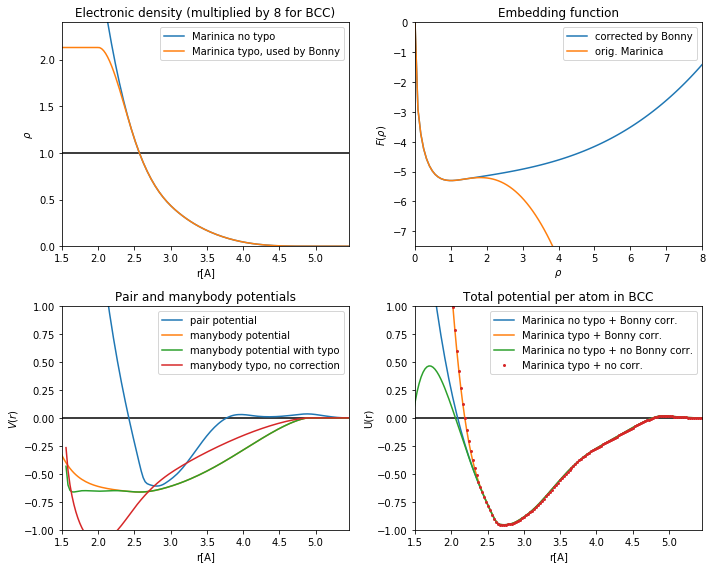

In [74]:
# plot the functions and potentials
rcut = 5.46
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_w_a, rho_w_r)*S*8 for x in r]
dens_old = np.array([rho(x, rho_w_a_old, rho_w_r)*S*8 for x in r])
imax = np.argmax(dens_old)
dens_old[0:imax] = dens_old.max()
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Marinica no typo')
plt.plot(r, dens_old, label='Marinica typo, used by Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [Fa(d, F_w_a, Fc_w_a) for d in dens]
embed_old = [Fe(d, F_w_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='corrected by Bonny')
plt.plot(dens, embed_old, label='orig. Marinica')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a, rho_w_r) for x in r]
#V(x, V_w_a, V_w_r) - 2*C*rho(x, rho_w_a_old, rho_w_r)
pot_manybody = [u_manybody(x) for x in r]
pot_manybody_typo = [u_manybody_typo(x) for x in r]
pot_manybody_marinica = [u_manybody_marinica(x) for x in r]

plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.plot(r, pot_manybody_typo, label='manybody potential with typo')
plt.plot(r, pot_manybody_marinica, label='manybody typo, no correction')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot(x) for x in r]
pot_bonny = [utot_bonny(x) for x in r]
pot_marinica = [utot_marinica(x) for x in r]
pot_marinica_typo = [utot_marinica_typo(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Marinica no typo + Bonny corr.')
plt.plot(r, pot_bonny, label='Marinica typo + Bonny corr.')
plt.plot(r, pot_marinica, label='Marinica no typo + no Bonny corr.')
plt.plot(r, pot_marinica_typo, 'o', ms=2, label='Marinica typo + no corr.')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

### Rhenium EAM potential (Bonny et al.)

In [24]:
# electronic density parameters
rho_re_a = [3.704045964e-3]
rho_re_r = [5.46]

# embeding function parameters
F_re_a = [-7.046791948, 1.23658472, 1.143405627]
#F_re_a = [-7.046791948, 0, 1.143405627]


# pair potential
V_re_a = [6.726805309, 3.217593889, -6.545857587e-1, 1.453229484e-1, -2.063629464e-1, 6.114909116e-2]
V_re_r = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]

In [28]:
def utot_re(x):
    u = 6*V(x, V_re_a, V_re_r)
    d = 12*rho(x, rho_re_a, rho_re_r)
    u += F(d, F_re_a)
    return u/12

def u_manybody_re(x):
    d = 12*rho(x, rho_re_a, rho_re_r)
    u = F(d, F_re_a)
    return u/12

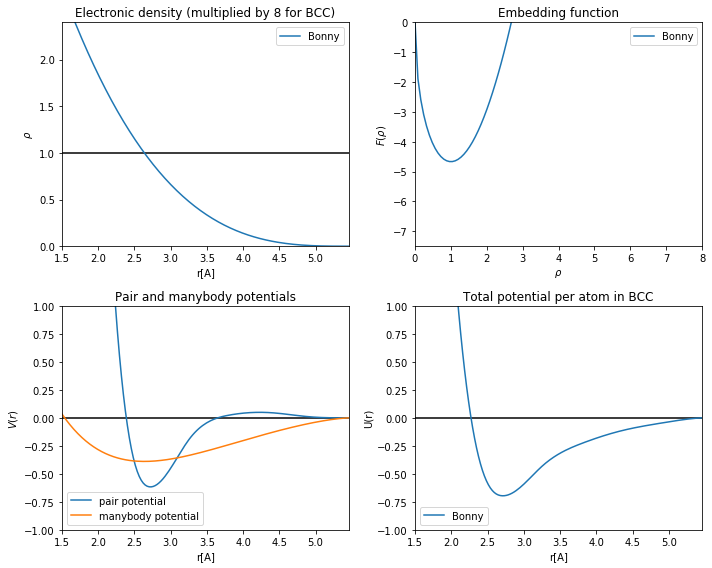

In [29]:
# plot the functions and potentials
rcut = 5.46
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_re_a, rho_re_r)*12 for x in r]
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [F(d, F_re_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='Bonny')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_re_a, V_re_r) for x in r]
pot_manybody = [u_manybody_re(x) for x in r]
plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot_re(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Bonny')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


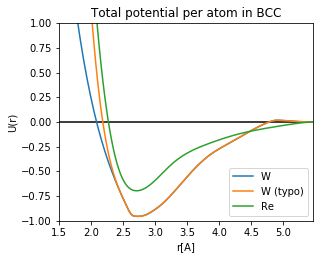

In [30]:
# Total potential per atom (bulk)
plt.figure(figsize=(10,8))
pot_w = [utot(x) for x in r]
pot_re = [utot_re(x) for x in r]
pot_marinica_typo = [utot_marinica_typo(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot_w, label='W')
plt.plot(r, pot_marinica_typo, label='W (typo)')
plt.plot(r, pot_re, label='Re')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

### Convert potentials into LAMMPS and Yuri formats

#### Pure elements W

In [160]:
# Ranges of densities and separations
rhomax = 10.0
nrho = 5000
drho = rhomax/nrho

nr = 5000
#rcut = 5.46
rcut = 5.4604375
dr = rcut/nr

ri = 1.0
ro = 2.0

# W properties
na = 74
ma = 183.84
lc = 3.1653
alat = 'bcc'

# System composition
n_el = 1
el_name = ['W']

In [150]:
def u_core(r, za=74, zb=74):
    qe_sq = 14.3992 # squared electron charge  
    rs = 0.4683766/(za**(2/3) + zb**(2/3))**0.5
    x = r/rs
    u  = 0.1818*np.exp(-3.2*x)
    u += 0.5099*np.exp(-0.9423*x)
    u += 0.2802*np.exp(-0.4029*x)
    u += 0.02817*np.exp(-0.2016*x)
    u *= za*zb*qe_sq/r
    return u

def u_combine(r, unucl, ueq, ri=1.0, ro=2.0):
    
    if r < ri:
        u = unucl
    elif r < ro:
        x = (ro + ri - 2*r)/(ro - ri)
        eta = 3/16*x**5 - 5/8*x**3 + 15/16*x + 1/2
        u = ueq + eta*(unucl - ueq)
    else:
        u = ueq
        
    return u

In [151]:
# Cubic spline function for pair potentials and electronic density
f_spline = lambda r, aa, kk: sum([a*(rk - r)**3 for a, rk in zip(aa, kk) if r < rk])

# Functional form for the embedding potential
f_embed = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2

# prepare lists of values
dens = np.linspace(0., rhomax-drho, nrho, endpoint=True)
r = np.linspace(0., rcut-dr, nr, endpoint=True)

#fembd = [f_embed(d, F_re_a) for d in dens] # Re
fembd = [Fa(d, F_w_a, Fc_w_a) for d in dens] # W

#edens = [f_spline(x, rho_re_a, rho_re_r) for x in r] # Re
edens = np.array([f_spline(x, rho_w_a_old, rho_w_r)*S for x in r]) # W
imax = np.argmax(edens)
edens[0:imax] = edens.max()

# Pair potential

# 1. Cubic spline for r > r_o
f_outer = [f_spline(x, V_w_a, V_w_r) - 2*C*edens[i]/S for i, x in enumerate(r)]

# 2. Repulsive core for r < r_i (precalculate up to r_o)
f_inner = [0.0] + [u_core(x) for x in r[1:]]

# 3. Transition region for r_i < r < r_o
fpair = [x*u_combine(x, f_inner[i], f_outer[i]) for i, x in enumerate(r)]

Write LAMMPS format file

In [140]:
with open('W_lv.eam.fs', 'w') as fo:
    
    # Comment section
    fo.write('Comment 1\n')
    fo.write('Comment 2\n')
    fo.write('Comment 3\n')
    
    # Number of elements
    fo.write(f"{n_el:5d} ")
    for i in range(n_el):
        fo.write(f"{el_name[i]:2}")
    fo.write("\n")
    
    # number of grid points, step size, and cutoff
    fo.write(f"{nrho:5d}{drho:24.16e}{nr:5d}{dr:24.16e}{rcut:24.16e}\n")
    
    # atomic number, mass, lattice size, lattice type
    fo.write(f"{na:5d} {ma:14.4f} {lc:14.4f} {alat:10}\n")
    
    # Embeding function
    for i in range(nrho//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fembd[i*4:i*4+4]))
    
    # Electronic density
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*edens[i*4:i*4+4]))
        
    # Pair potential
    for i in range(nr//4):
        fo.write("{0:20.12e}{1:20.12e}{2:20.12e}{3:20.12e}\n".format(*fpair[i*4:i*4+4]))

## Optimize

Script? Load Module?